<a href="https://colab.research.google.com/github/wooffyy/Cancer-Cell-Classification/blob/main/cancer_cell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DATA COLLECTING**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/cell_samples.csv')
df.head(n=10)

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


**INSIGHT**

About Cancer Cell Dataset :


1.   This dataset is retrivied from a private source that contains detailed attributes representing tumor characteristics observed in tissue samples. By analyzing these attributes, we can gain insight into tumor behavior and develop predictive models for cancer detection and prognosis.
2.   This dataset has 11 columns, namely:


  *   **ID** : Sample code number, unique identifier for each tissue sample.
  *   **Clump** : Clump thickness, Assessment of the thickness of tumor cell clusters (1 - 10).
  *   **UnifSize** : Uniformity of cell size, uniformity in the size of tumor cells (1 - 10).
  *   **UnifShape** : Uniformity of cell shape, uniformity in the shape of tumor cells (1 - 10).
  *   **MargAdh** : Marginal adhesion, degree of adhesion of tumor cells to surrounding tissue (1 - 10).
  *   **SingEpiSize** : Single epithelial cell size, size of individual tumor cells (1 - 10).
  *   **BareNuc** : Bare nuclei, presence of nuclei without surrounding cytoplasm (1 - 10).
  *   **BlandChrom** : Bland chromatin, assessment of chromatin structure in tumor cells (1 - 10).
  *   **NormNucl** : Normal nucleoli, presence of normal-looking nucleoli in tumor cells (1 - 10).
  *   **Mit** : Mitoses, frequency of mitotic cell divisions (1 - 10).
  *   **Class** : Class, classification of tumor type (2 for benign, 4 for malignant).

# **EXPLORATORY DATA ANALYSIS (EDA) & DATA PREPROCESSING**

## Understanding Dataset Structure and Statistics

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 690 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   ID           690 non-null    int64
 1   Clump        690 non-null    int64
 2   UnifSize     690 non-null    int64
 3   UnifShape    690 non-null    int64
 4   MargAdh      690 non-null    int64
 5   SingEpiSize  690 non-null    int64
 6   BareNuc      690 non-null    int64
 7   BlandChrom   690 non-null    int64
 8   NormNucl     690 non-null    int64
 9   Mit          690 non-null    int64
 10  Class        690 non-null    int64
dtypes: int64(11)
memory usage: 64.7 KB


**INSIGHT**


*   There are no missing values ​​in this dataset so far, all columns have complete data i.e. 699
*   BareNuc column has wrong data type, it should be integer not object



In [7]:
df.describe()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
count,6.900000e+02,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,1.073826e+06,4.428986,3.133333,3.204348,2.827536,3.213043,3.482609,3.436232,2.885507,1.594203,2.689855
std,6.196092e+05,2.817378,3.042451,2.960844,2.867787,2.200964,3.617064,2.444060,3.067682,1.724230,0.951379
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.744845e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171752e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238450e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [8]:
df['Class'].value_counts()

,count
Class,
2,452
4,238


There are more data on benign tumors than malignant tumors (2 for benign and 4 for malignant)

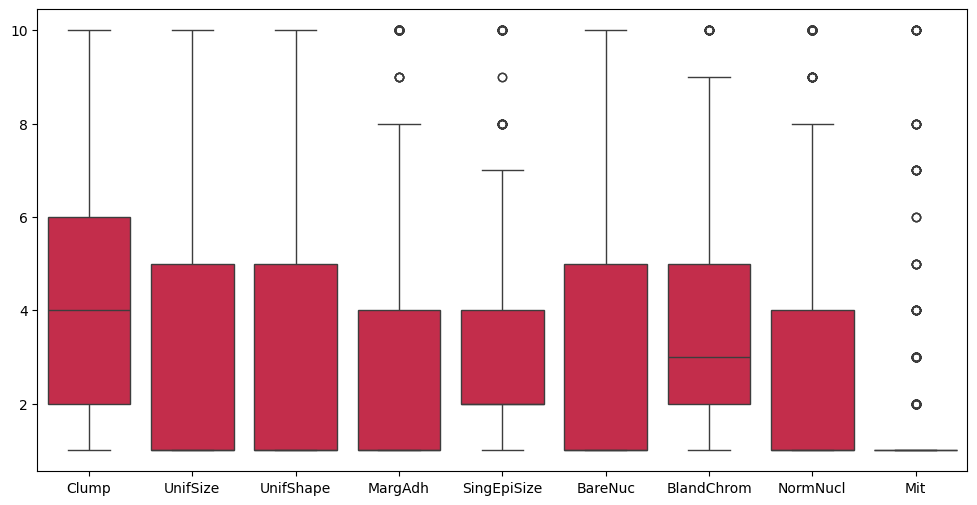

In [9]:
# Box-Plot
plt.figure(figsize=(12,6))
sns.boxplot(data=df.drop(columns=["ID", "Class"]), color='crimson')
plt.show()

In [10]:
# Checking Outliers with IQR
data = df.drop(columns=["ID", "Class"])
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = ((data < lower_bound) | (data > upper_bound)).sum()

print("Outliers :")
print(outliers)

Outliers :
Clump            0
UnifSize         0
UnifShape        0
MargAdh         60
SingEpiSize     52
BareNuc          0
BlandChrom      20
NormNucl        77
Mit            119
dtype: int64


After checking for outliers, there are five columns that have outliers in them.

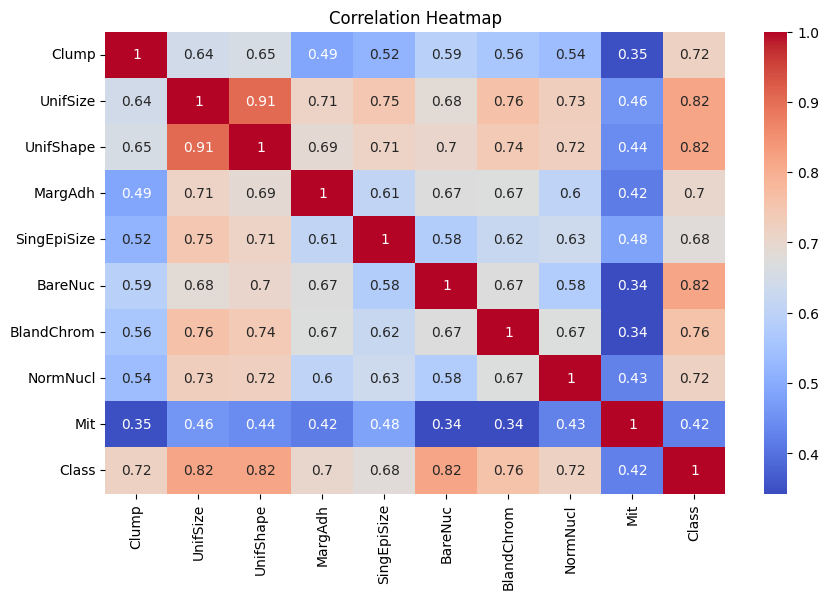

In [11]:
df_tocorr = df.copy()
df_tocorr.drop(['ID'], axis=1, inplace=True)
plt.figure(figsize=(10, 6))
sns.heatmap(df_tocorr.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**INSIGHT**

Looking at the correlation heatmap, there are several key insights about the relationships between various features:

1. The features with the strongest correlation to the target class (Class) are:

  * UnifSize (0.82)
  * UnifShape (0.82)
  * BareNuc (0.82)
  * BlandChrom (0.76)
  * Clump (0.72)
  * NormNucl (0.71)

2. Mitosis (Mit) shows the weakest correlations with other features (0.34-0.48)


## Handling Missing Values and Data Type Conversion

In [3]:
# Checking all '?' values
(df == '?').sum()

,0
ID,0
Clump,0
UnifSize,0
UnifShape,0
MargAdh,0
SingEpiSize,0
BareNuc,16
BlandChrom,0
NormNucl,0
Mit,0


After taking some samples from the dataset, there are '?' values ​​in BareNuc, and it turns out there are 16 of them.

In [4]:
# Replace '?' with NaN
df['BareNuc'] = df['BareNuc'].replace('?', np.nan)

# Convert to numeric (but keep missing values as NaN)
df['BareNuc'] = pd.to_numeric(df['BareNuc'])

# Fill NaN with median
df['BareNuc'].fillna(df['BareNuc'].median(), inplace=True)

# Convert back to integer
df['BareNuc'] = df['BareNuc'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   ID           699 non-null    int64
 1   Clump        699 non-null    int64
 2   UnifSize     699 non-null    int64
 3   UnifShape    699 non-null    int64
 4   MargAdh      699 non-null    int64
 5   SingEpiSize  699 non-null    int64
 6   BareNuc      699 non-null    int64
 7   BlandChrom   699 non-null    int64
 8   NormNucl     699 non-null    int64
 9   Mit          699 non-null    int64
 10  Class        699 non-null    int64
dtypes: int64(11)
memory usage: 60.2 KB


<ipython-input-4-6aa5d7b39fc7>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BareNuc'].fillna(df['BareNuc'].median(), inplace=True)


Data with the value '?' has now been replaced with the median value from the BareNuc column because using the mean would not be appropriate for the BareNuc column which is a discrete scale (0-10).

In [5]:
# Checking duplicates
print("Duplicated :", df.duplicated().sum())

# Remove duplicates
df.drop_duplicates(inplace=True)

df.info()

Duplicated : 9
<class 'pandas.core.frame.DataFrame'>
Index: 690 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   ID           690 non-null    int64
 1   Clump        690 non-null    int64
 2   UnifSize     690 non-null    int64
 3   UnifShape    690 non-null    int64
 4   MargAdh      690 non-null    int64
 5   SingEpiSize  690 non-null    int64
 6   BareNuc      690 non-null    int64
 7   BlandChrom   690 non-null    int64
 8   NormNucl     690 non-null    int64
 9   Mit          690 non-null    int64
 10  Class        690 non-null    int64
dtypes: int64(11)
memory usage: 64.7 KB


After duplicate checking, 9 identical rows were found and removed to prevent redundancy and ensure data integrity

## Label Encoding and Scaling

In [12]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

df['Class'] = LabelEncoder().fit_transform(df['Class'])
df['Class'].value_counts()

,count
Class,
0,452
1,238


Label Encoding of Class column to ensure it's compatibility in different model and memory efficiency

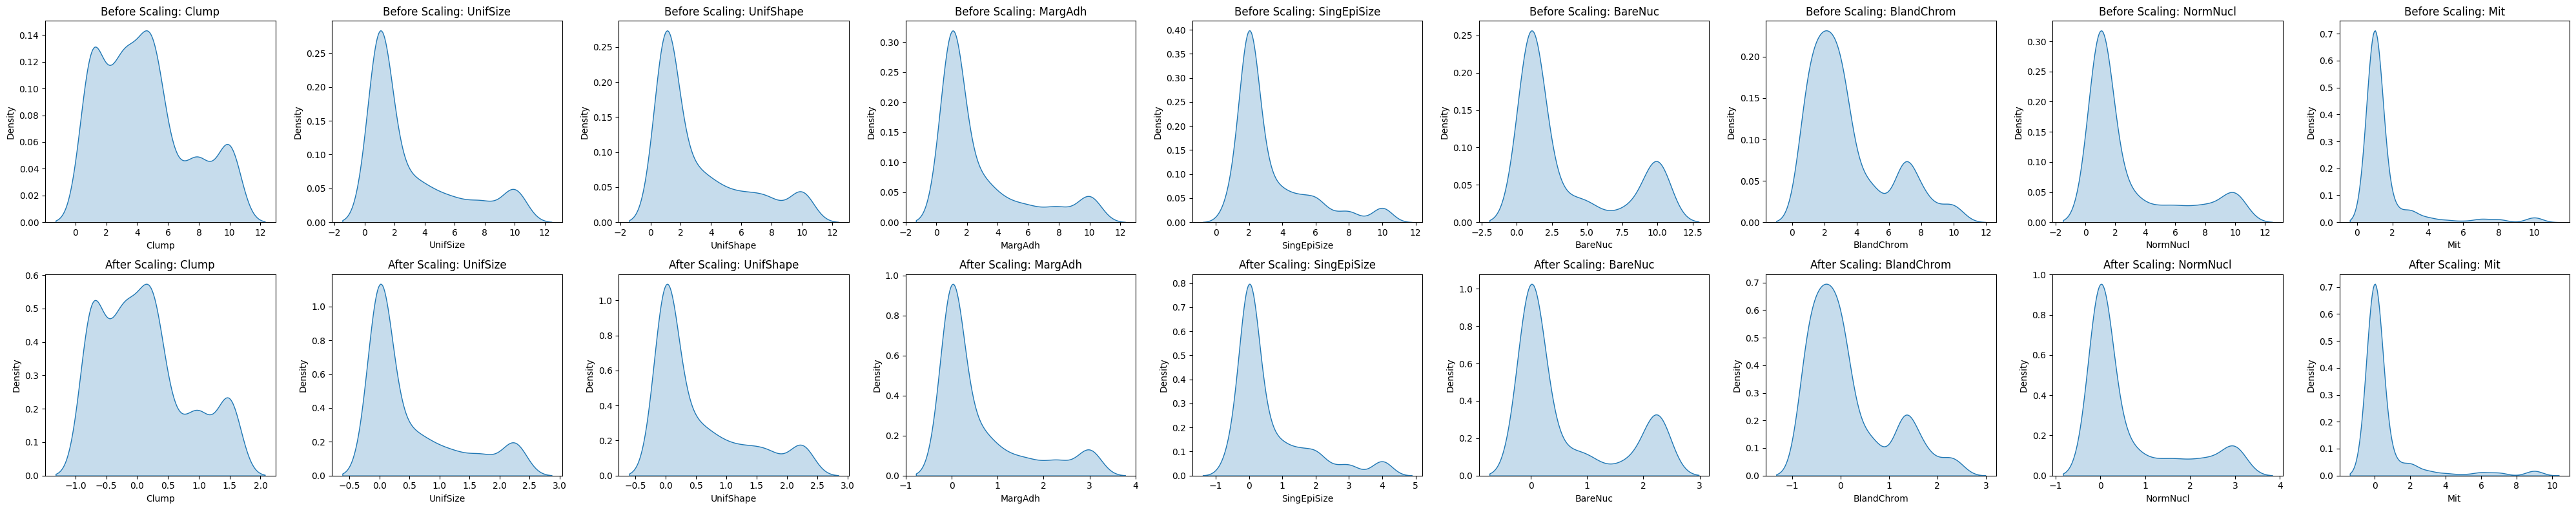

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,0.107246,0.533333,0.551087,0.609179,0.606522,0.620652,0.145411,0.628502,0.594203
std,0.704345,0.760613,0.740211,0.955929,1.100482,0.904266,0.814687,1.022561,1.724230
min,-0.750000,0.000000,0.000000,0.000000,-0.500000,0.000000,-0.666667,0.000000,0.000000
25%,-0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.333333,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.500000,1.000000,1.000000,1.000000,1.000000,1.000000,0.666667,1.000000,0.000000
max,1.500000,2.250000,2.250000,3.000000,4.000000,2.250000,2.333333,3.000000,9.000000


In [13]:
# Robust Scaling
from sklearn.preprocessing import RobustScaler

df_toscaled = df.drop(['ID', 'Class'], axis=1)

scaler = RobustScaler()
df_scaled = scaler.fit_transform(df_toscaled)
df_scaled = pd.DataFrame(df_scaled, columns=df_toscaled.columns)

fig, axes = plt.subplots(nrows=2, ncols=len(df_toscaled.columns), figsize=(40, 8))

for i, col in enumerate(df_toscaled.columns):
    # KDE plot sebelum scaling
    sns.kdeplot(df[col], ax=axes[0, i], fill=True)
    axes[0, i].set_title(f"Before Scaling: {col}")

    # KDE plot sesudah scaling
    sns.kdeplot(df_scaled[col], ax=axes[1, i], fill=True)
    axes[1, i].set_title(f"After Scaling: {col}")

plt.tight_layout()
plt.show()

df_scaled.describe()

Perform Robust Scaling to the dataset to improve the performance of distance-based models such as SVM and KNN. The reason for using robust scaling is because robust scaling uses IQR and Median so that outliers cannot affect the scaling process.

# **MODEL TRAINING & EVALUATION**

## K-Nearest Neighbor (KNN)

Before Hyperparameter Tuning

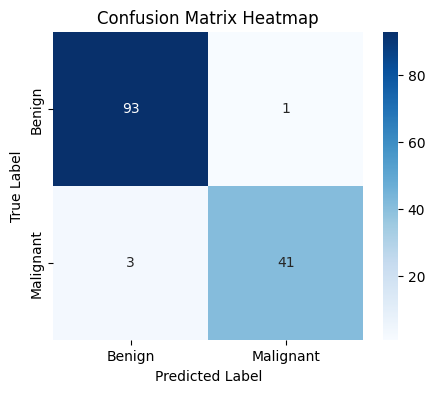

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        96
           1       0.93      0.98      0.95        42

    accuracy                           0.97       138
   macro avg       0.96      0.97      0.97       138
weighted avg       0.97      0.97      0.97       138

Training Accuracy: 97.28%
Test Accuracy: 97.10%
KNN model accuracy: 97.10%
F1 Score: 0.9708


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier


X = df_scaled
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Evaluate KNN model
knn_acc = accuracy_score(y_test, knn.predict(X_test)) * 100
train_acc = accuracy_score(y_train, knn.predict(X_train)) * 100
test_acc = accuracy_score(y_test, knn.predict(X_test)) * 100

yKNN_pred = knn.predict(X_test)

f1_knn = f1_score(y_test, yKNN_pred, average='weighted')

# Plot heatmap
cm = confusion_matrix(y_test, yKNN_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

print(classification_report(yKNN_pred, y_test))
print(f"Training Accuracy: {train_acc:.2f}%")
print(f"Test Accuracy: {test_acc:.2f}%")
print(f"KNN model accuracy: {knn_acc:.2f}%")
print(f"F1 Score: {f1_knn:.4f}")


Hyperparameter Tuning Using Elbow Method

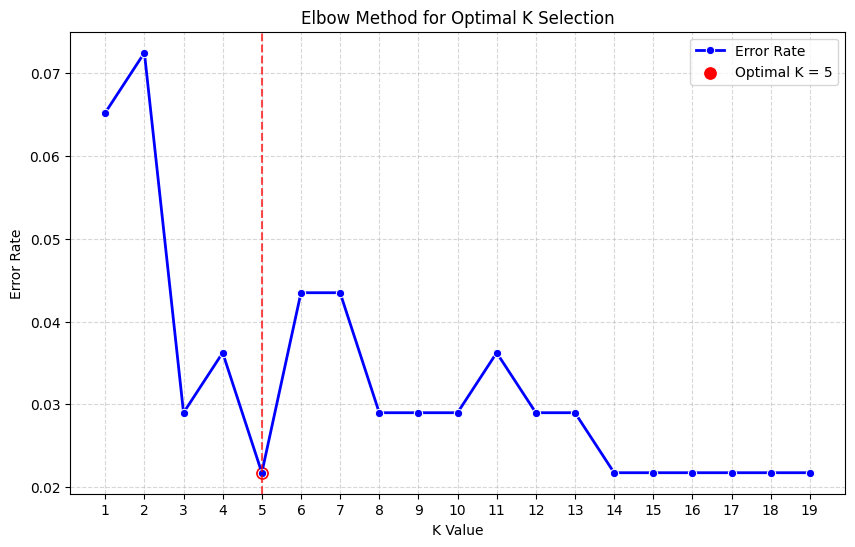

In [15]:
# Range of K values to test
k_values = range(1, 20)
error_rates = []

# Finding the error rate for each K
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error_rates.append(1 - accuracy_score(y_test, y_pred))

# Find optimal K (Elbow Point - minimum error)
optimal_k = k_values[np.argmin(error_rates)]
min_error = min(error_rates)

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(x=k_values, y=error_rates, marker="o", linewidth=2, label="Error Rate", color="blue")
sns.scatterplot(x=[optimal_k], y=[min_error], color='red', s=100, label=f"Optimal K = {optimal_k}")

# Formatting
plt.axvline(x=optimal_k, linestyle="--", color="red", alpha=0.7)
plt.xticks(k_values)
plt.xlabel("K Value")
plt.ylabel("Error Rate")
plt.title("Elbow Method for Optimal K Selection")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

After Hyperparameter Tuning

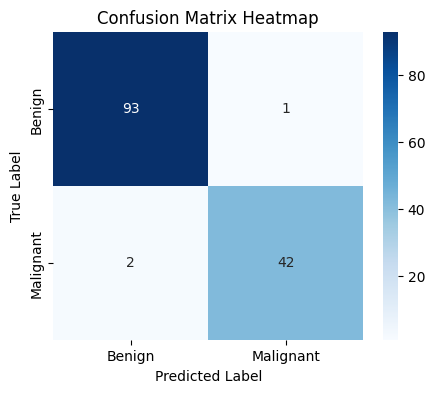

              precision    recall  f1-score   support

           0       0.99      0.98      0.98        95
           1       0.95      0.98      0.97        43

    accuracy                           0.98       138
   macro avg       0.97      0.98      0.97       138
weighted avg       0.98      0.98      0.98       138

Training Accuracy: 96.01%
Test Accuracy: 97.83%
KNN model accuracy: 97.83%
F1 Score: 0.9782


In [16]:
knn_new = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Evaluate KNN model
knn_acc = accuracy_score(y_test, knn.predict(X_test)) * 100
train_acc = accuracy_score(y_train, knn.predict(X_train)) * 100
test_acc = accuracy_score(y_test, knn.predict(X_test)) * 100

yKNN_pred = knn.predict(X_test)

f1_knn = f1_score(y_test, yKNN_pred, average='weighted')

# Plot heatmap
cm = confusion_matrix(y_test, yKNN_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

print(classification_report(yKNN_pred, y_test))
print(f"Training Accuracy: {train_acc:.2f}%")
print(f"Test Accuracy: {test_acc:.2f}%")
print(f"KNN model accuracy: {knn_acc:.2f}%")
print(f"F1 Score: {f1_knn:.4f}")


**INSIGHT**

Based on the results before and after Hyperparameter Tuning with several with several different runtimes, the following are the best results of the evaluation :


*   Model has better performance after Hyperparameter Tuning with 97,83% accuracy from the previous 97,10%
*   Precission and Recall value has increase after Hyperparameter Tuning too
    - Benign Class (0.0) : Recall increase from 0,97 to 0,98
    - Malignant Class (1.0) : Precision increase from 0,93 to 0,95
* Train Accuracy has decrease from 97,28% to 96,74% but Test Accuracy has increase from 97,10% to 97,83%


> Overall, model has shown optimal performance even before Hyperparameter Tuning. Based on precision and recall values, model is able to minimize errors (False Negative and Positive) very well. Test and Train Accuracy also shows that model better at handling new data (test data).






## Random Forest Classifier

Before Hyperparameter Tuning

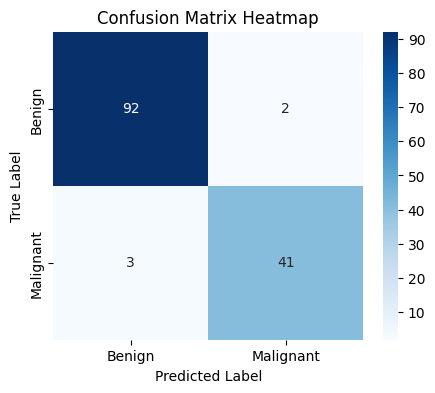

              precision    recall  f1-score   support

           0       0.98      0.97      0.97        95
           1       0.93      0.95      0.94        43

    accuracy                           0.96       138
   macro avg       0.96      0.96      0.96       138
weighted avg       0.96      0.96      0.96       138

Training Accuracy: 100.00%
Test Accuracy: 96.38%
Random Forest model accuracy: 96.38%
F1 Score: 0.9637


In [17]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop(['ID', 'Class'], axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)

# Evaluate Random Forest model
rf_acc = accuracy_score(y_test, rf.predict(X_test)) * 100
train_acc = accuracy_score(y_train, rf.predict(X_train)) * 100
test_acc = accuracy_score(y_test, rf.predict(X_test)) * 100

yRF_pred = rf.predict(X_test)

f1_rf = f1_score(y_test, yRF_pred, average='weighted')

# Plot heatmap
cm = confusion_matrix(y_test, yRF_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

print(classification_report(yRF_pred, y_test))
print(f"Training Accuracy: {train_acc:.2f}%")
print(f"Test Accuracy: {test_acc:.2f}%")
print(f"Random Forest model accuracy: {rf_acc:.2f}%")
print(f"F1 Score: {f1_rf:.4f}")


Hyperparameter Tuning Using Grid Search

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Parameters: {'bootstrap': True, 'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best Accuracy: 96.20964418551068


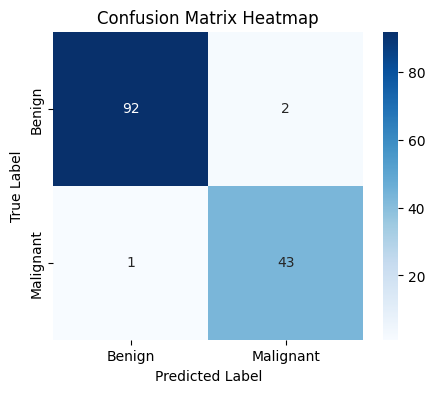

              precision    recall  f1-score   support

           0       0.98      0.99      0.98        93
           1       0.98      0.96      0.97        45

    accuracy                           0.98       138
   macro avg       0.98      0.97      0.98       138
weighted avg       0.98      0.98      0.98       138

Training Accuracy: 98.91%
Test Accuracy: 97.83%
Random Forest model accuracy: 97.83%
F1 Score: 0.9783


In [18]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

rf = RandomForestClassifier()
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

## Overfitting Parameter Grid ##
"""
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features' : ["sqrt", "log2"]
}
"""

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 5, 10],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True]
}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='f1',
    cv=cv,
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_ * 100)

rf_gs = grid_search.best_estimator_

# Evaluate Random Forest model
rf_acc = accuracy_score(y_test, rf_gs.predict(X_test)) * 100
train_acc = accuracy_score(y_train, rf_gs.predict(X_train)) * 100
test_acc = accuracy_score(y_test, rf_gs.predict(X_test)) * 100

yRFGS_pred = rf_gs.predict(X_test)

f1_rf = f1_score(y_test, yRFGS_pred, average='weighted')

# Plot heatmap
cm = confusion_matrix(y_test, yRFGS_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

print(classification_report(yRFGS_pred, y_test))
print(f"Training Accuracy: {train_acc:.2f}%")
print(f"Test Accuracy: {test_acc:.2f}%")
print(f"Random Forest model accuracy: {rf_acc:.2f}%")
print(f"F1 Score: {f1_rf:.4f}")

Hyperparameter Tuning Using Randomized Search

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 10, 'max_features': 'log2', 'max_depth': 20, 'bootstrap': True}
Best Accuracy: 96.22671764865856


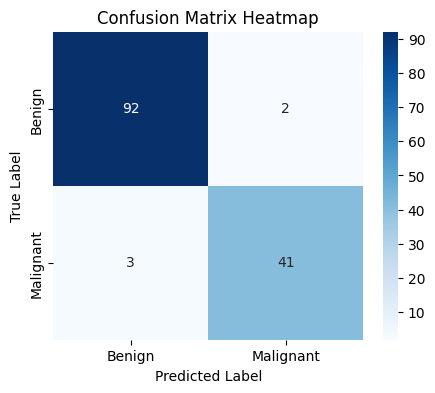

              precision    recall  f1-score   support

           0       0.98      0.97      0.97        95
           1       0.93      0.95      0.94        43

    accuracy                           0.96       138
   macro avg       0.96      0.96      0.96       138
weighted avg       0.96      0.96      0.96       138

Training Accuracy: 96.92%
Test Accuracy: 96.38%
Random Forest model accuracy: 96.38%
F1 Score: 0.9637


In [19]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

rf = RandomForestClassifier()
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

## Overfitting Parameter Grid ##
"""
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features' : ["sqrt", "log2"]
}
"""

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 5, 10],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True]
}

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=100,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_ * 100)

rf_rs = random_search.best_estimator_

# Evaluate Random Forest model
rf_acc = accuracy_score(y_test, rf_rs.predict(X_test)) * 100
train_acc = accuracy_score(y_train, rf_rs.predict(X_train)) * 100
test_acc = accuracy_score(y_test, rf_rs.predict(X_test)) * 100

yRFRS_pred = rf_rs.predict(X_test)

f1_rf = f1_score(y_test, yRFRS_pred, average='weighted')

# Plot heatmap
cm = confusion_matrix(y_test, yRFRS_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

print(classification_report(yRFRS_pred, y_test))
print(f"Training Accuracy: {train_acc:.2f}%")
print(f"Test Accuracy: {test_acc:.2f}%")
print(f"Random Forest model accuracy: {rf_acc:.2f}%")
print(f"F1 Score: {f1_rf:.4f}")


**INSIGHT**

Based on the results before and after Hyperparameter Tuning with two methods (Grid Search and Randomized Search), also with several different runtimes, the following are the best results of the evaluation :


*   After running the model without tuning, accuracy score 96,38% was obtained. But, the thing that needs to be concern is the training score which reaches 100%, which indicates overfitting.  
*   After being tried running by tuning with the first grid parameter (labeled *Overfitting Parameter Grid*), the accuracy score did not change by 96.38%. However, there is a difference in the training score, in Grid Search the training score is 100%, while in Random Search the training score is 99.82%, but this still indicates overfitting.
*   After making some adjustments to the grid parameters and finally giving the best results so far with an accuracy score of 97.83%. If we look at it, the training score has decreased to 98.91% for Grid Search and 96.92% for Random Search which is better than before.



> Overall, Hyperparameter Tuning didn't giving a significant increase in accuracy scores, but it still helps to reduce overfitting. Grid Search provides the highest accuracy score which better than Random Search, but with high score of training accuracy make it tends to overfitting. With accuracy score 97,83% Random Forest has a stable performance and able to avoid errors well.

## Support Vector Machine (SVM)

Before Hyperparameter Tuning

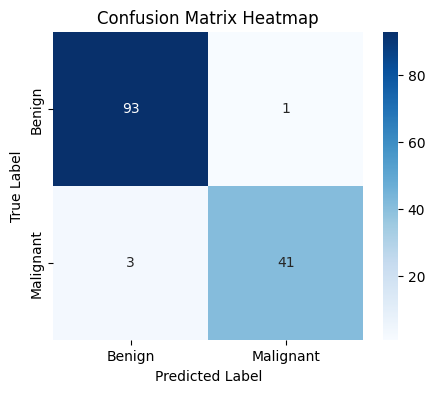

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        96
           1       0.93      0.98      0.95        42

    accuracy                           0.97       138
   macro avg       0.96      0.97      0.97       138
weighted avg       0.97      0.97      0.97       138

Training Accuracy: 97.10%
Test Accuracy: 97.10%
SVM model accuracy: 97.10%
F1 Score: 0.9708


In [21]:
from sklearn.svm import SVC

X = df_scaled
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train, y_train)

# Evaluate Random Forest model
svm_acc = accuracy_score(y_test, svm.predict(X_test)) * 100
train_acc = accuracy_score(y_train, svm.predict(X_train)) * 100
test_acc = accuracy_score(y_test, svm.predict(X_test)) * 100

ySVM_pred = svm.predict(X_test)

f1_svm = f1_score(y_test, ySVM_pred, average='weighted')

# Plot heatmap
cm = confusion_matrix(y_test, ySVM_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

print(classification_report(ySVM_pred, y_test))
print(f"Training Accuracy: {train_acc:.2f}%")
print(f"Test Accuracy: {test_acc:.2f}%")
print(f"SVM model accuracy: {svm_acc:.2f}%")
print(f"F1 Score: {f1_svm:.4f}")

Hyperparameter Tuning Using Grid Search

Fitting 5 folds for each of 640 candidates, totalling 3200 fits
Best Parameters: {'C': 10, 'class_weight': None, 'coef0': 0.3, 'degree': 2, 'gamma': 0.02, 'kernel': 'rbf'}
Best Accuracy: 95.99569878132137


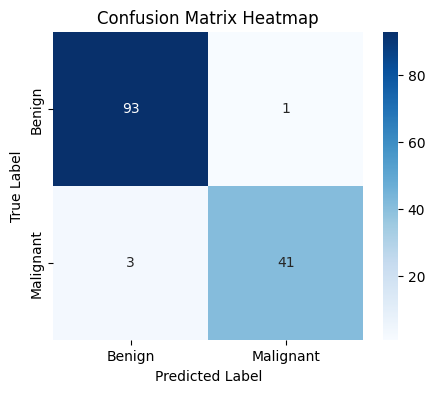

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        96
           1       0.93      0.98      0.95        42

    accuracy                           0.97       138
   macro avg       0.96      0.97      0.97       138
weighted avg       0.97      0.97      0.97       138

Training Accuracy: 97.28%
Test Accuracy: 97.10%
SVM model accuracy: 97.10%
F1 Score: 0.9708


In [22]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_grid = {
    'kernel': ['poly', 'rbf'],
    'C': [5, 7, 10, 15, 20],
    'gamma': [0.005, 0.01, 0.02, 0.05],
    'degree': [2, 3],
    'coef0': [0.3, 0.5, 0.7, 1.0],
    'class_weight': [None, 'balanced'],
}

grid_search = GridSearchCV(
    estimator=SVC(),
    param_grid=param_grid,
    scoring='f1',
    cv=cv,
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_ * 100)

SVM_gs = grid_search.best_estimator_

# Evaluate Random Forest model
rf_acc = accuracy_score(y_test, SVM_gs.predict(X_test)) * 100
train_acc = accuracy_score(y_train, SVM_gs.predict(X_train)) * 100
test_acc = accuracy_score(y_test, SVM_gs.predict(X_test)) * 100

ySVM_GS_pred = SVM_gs.predict(X_test)

f1_rf = f1_score(y_test, ySVM_GS_pred, average='weighted')

# Plot heatmap
cm = confusion_matrix(y_test, ySVM_GS_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

print(classification_report(ySVM_GS_pred, y_test))
print(f"Training Accuracy: {train_acc:.2f}%")
print(f"Test Accuracy: {test_acc:.2f}%")
print(f"SVM model accuracy: {rf_acc:.2f}%")
print(f"F1 Score: {f1_rf:.4f}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'kernel': 'poly', 'gamma': 0.01, 'degree': 3, 'coef0': 1.0, 'class_weight': None, 'C': 20}
Best Accuracy: 96.15384615384615


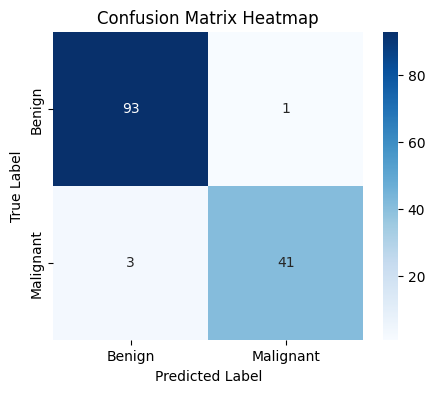

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        96
           1       0.93      0.98      0.95        42

    accuracy                           0.97       138
   macro avg       0.96      0.97      0.97       138
weighted avg       0.97      0.97      0.97       138

Training Accuracy: 97.28%
Test Accuracy: 97.10%
SVM model accuracy: 97.10%
F1 Score: 0.9708


In [23]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_grid = {
    'kernel': ['poly', 'rbf'],
    'C': [5, 7, 10, 15, 20],
    'gamma': [0.005, 0.01, 0.02, 0.05],
    'degree': [2, 3],
    'coef0': [0.3, 0.5, 0.7, 1.0],
    'class_weight': [None, 'balanced'],
}

random_search = RandomizedSearchCV(
    estimator=SVC(),
    param_distributions=param_grid,
    n_iter=100,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_ * 100)

SVM_rs = random_search.best_estimator_

# Evaluate Random Forest model
rf_acc = accuracy_score(y_test, SVM_rs.predict(X_test)) * 100
train_acc = accuracy_score(y_train, SVM_rs.predict(X_train)) * 100
test_acc = accuracy_score(y_test, SVM_rs.predict(X_test)) * 100

ySVM_RS_pred = SVM_rs.predict(X_test)

f1_rf = f1_score(y_test, ySVM_RS_pred, average='weighted')

# Plot heatmap
cm = confusion_matrix(y_test, ySVM_RS_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

print(classification_report(ySVM_RS_pred, y_test))
print(f"Training Accuracy: {train_acc:.2f}%")
print(f"Test Accuracy: {test_acc:.2f}%")
print(f"SVM model accuracy: {rf_acc:.2f}%")
print(f"F1 Score: {f1_rf:.4f}")

**INSIGHT**

Based on the results before and after Hyperparameter Tuning with two methods (Grid Search and Randomized Search), also with several different runtimes, the following are the best results of the evaluation :

*   After hyperparameter tuning with two different methods, there was no increase in accuracy score compared to the results before tuning with the same accuracy score at 97.10%.
*  If compared between Grid and Random Search, Random Search has better performance than Grid Search because if we look into computational resources needed, its only need 500 fits while Grid Search needs 3200 fits. But in the end default parameter still give the best performance.

> Overall, SVM model has optimal performance with 97,10%. The fact that just using default parameter give better performance shows the stability of the SVM model in this dataset, which is a positive indication that this model will perform consistently on new data.





# **CONCLUSION**

After doing model traning with three different model (KNN, Random Forest, and SVM) also with three different methods of hyperparameter tuning (Elbow Method on KNN, Grid Search, and Random Search). Here are the Top 3 Best Models for each model used in this Dataset:

## **1.   KNN After Hyperparameter Tuning Version**
    
With the highest accuracy score among all models and versions, which is 97.83%, this model is the best model for this dataset. Low computing resources and low risk of overfitting make this model also very efficient and able to minimizes size of errors.

## **2.   SVM Default Parameter (Before Hyperparameter Tuning) Version**
    
With an accuracy score of 97.10% without hyperparameter tuning, this model is a very efficient model and shows that SVM with default parameters is able to find a hyperplane that separates classes very well. Tuning can actually add unnecessary complexity and actually cause overfitting.

## **3.     Random Forest Grid Search Version**
Although not a model with truly optimal performance, this model is the best among other versions of Random Forest with the highest accuracy score but there is still a possibility of overfitting. With an accuracy score of 97.83% with 810 fits, this model already has good performance and minimizes errors

In [24]:
# Testing with new data
new_data = pd.DataFrame({
    'Clump': [1],
    'UnifSize': [1],
    'UnifShape': [1],
    'MargAdh': [1],
    'SingEpiSize': [2],
    'BareNuc': [1],
    'BlandChrom': [3],
    'NormNucl': [1],
    'Mit': [1]
})

new_data_scaled = scaler.transform(new_data)
new_data_scaled = pd.DataFrame(new_data_scaled, columns=new_data.columns)

knn_prediction = knn.predict(new_data_scaled)
print("KNN Prediction:", knn_prediction)

rf_prediction = rf_gs.predict(new_data)
print("Random Forest Prediction:", rf_prediction)

svm_prediction = svm.predict(new_data_scaled)
print("SVM Prediction:", svm_prediction)

KNN Prediction: [0]
Random Forest Prediction: [0]
SVM Prediction: [0]
